# RNN

This is an implementation of vanilla RNN for character-level language model. This implementation is inspired by the great [blog post](http://karpathy.github.io/2015/05/21/rnn-effectiveness/) and lectures of Andrej Karpathy. For more details about RNNs please see references. Below you can see the math of forward pass and backward pass of simple network.

## What are RNNs?

[Recurrent neural networks (RNNs)](https://en.wikipedia.org/wiki/Recurrent_neural_network) are a type of artificial neural network designed to recognize patterns in sequences of data, such as text, genomes, handwriting, the spoken word, or numerical times series data emanating from sensors, stock markets and government agencies. These algorithms take time and sequence into account, they have a temporal dimension. 


The necessity of RNNs is raising, when our current output depends on not only from current input, but some earlier inputs also. For example if we want to predict the next character of the word, then it basically depends on all the previous charaters of word, or if want to predict gold price at timestamp $t_{n}$, then typically we have to take into consideration prices at eralier k timestamps $t_{n-k}, t_{n-k+1}, ... t_{n-1}$, where k can be even greater than 100. Traditional [feedforward neural networks](https://en.wikipedia.org/wiki/Feedforward_neural_network) do not handle such cases, because they do not have so called `internal memory`. For example if we are classifiying images using feedforward neural network then this network does not care which animal picture (cat or dog) is the first input: the ouputs will not be changed if we reverse the order of inputs. That is, a feedforward network has no notion of order in time, and the only input it considers is the current example it has been exposed to. Feedforward networks are amnesiacs regarding their recent past; they remember nostalgically only the formative moments of training.


Recurrent networks, on the other hand, take as their input not just the current input example they see, but also what they have perceived previously in time: they look quite similar to a traditional neural network except that a `memory-state` is added to the neurons.  Because of their internal memory, RNN’s are able to remember important things about the input they received, which enables them to be very precise in predicting what’s coming next.

RNN architecture


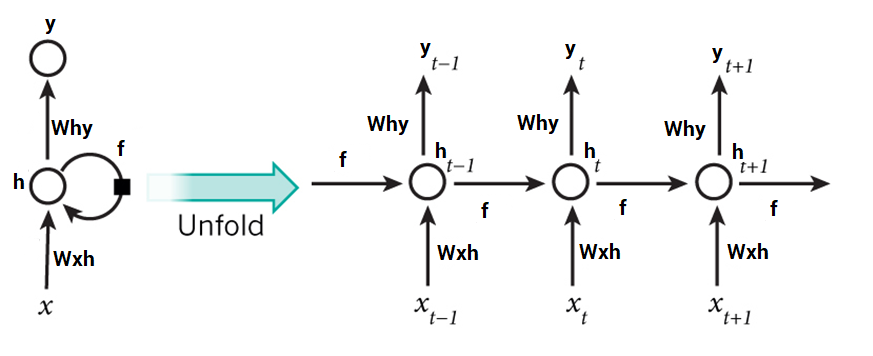

In [5]:
from IPython.display import Image
print('RNN architecture')
Image('data/01.png')

The above picture illustarates RNN basic architecture. 

The decision a recurrent net reached at time step `t-1` affects the decision it will reach one moment later at time step `t`. So recurrent networks have two sources of input, the present and the recent past, which combine to determine how they respond to new data, much as we do in life. This feedback loop connected to their past decisions, ingesting their own outputs moment after moment as input, is sp called `internal memmory`. It keeps the information from sequence itself. That sequential information is preserved in the recurrent network’s hidden state <font color=red>$h_{t}$</font>, which manages to span many time steps as it cascades forward to affect the processing of each new example. It is finding correlations between events separated by many moments, and these correlations are called “long-term dependencies”, because an event downstream in time depends upon, and is a function of, one or more events that came before. So current output <font color=red>$y_{t}$</font> depends not only from current input <font color=red>$x_{t}$</font>, but also from state at current moment <font color=red>$h_{t}$</font>. 

###### Mathematically

$$ h_{t} = f(W_{hh}h_{t-1} + W_{xh}x_{t}) $$

$$ y_{t} = W_{hy}h_{t} $$

Where $h_{t}$ is the state at time $t$, $x_{t}$ an exogenous input at time $t$. The final output of the network $y_{t}$ at a certain timestep $t$ is typically computed from one or more states $h_{t-k}, h_{t-k+1} \cdots h_{t}$.


$W_{hh}$, $W_{xh}$ and $W_{hy}$  are parameters like the weights parameters in feedforward nets.

$f$ function is called activation function like for feedforward nets and can be $tanh, sigmoid, ReLU, \cdots$ . 

## RNN Training

Training a RNN is similar to training a traditional Neural Network. We also use the backpropagation algorithm, but here algorithm is more complicated. The complex part is connected with parameters sharing across all time sequence: note that $W_{hh}$, $W_{xh}$ and $W_{hy}$ are the same for all $t$ and $t-1$. Because the parameters are shared by all time steps in the network, the gradient at each output depends not only on the calculations of the current time step, but also the previous time steps. The algorithm for doing this is called [Backpropagation Through Time (BPTT)](https://en.wikipedia.org/wiki/Backpropagation_through_time).

###### Mathematically

Mathematically we have to perform gradient descent, aka we have to change our model parameters $W_{hh}, W_{xh}, W_{hy}$ in a way, that loss is decreaseing. So we have to calculate the following gradients:

$$ \frac{\partial J}{\partial W_{hy}}, \frac{\partial J}{\partial W_{hh}}, \frac{\partial J}{\partial W_{hx}} .$$

The total loss for a given sequence of input values $ \{x_{1}, x_{2}, \cdots, x_{T}\} $ paired with a sequence of target values $ \{ target_{1}, target_{2}, \cdots, target_{T} \} $ would then be just
the sum of the losses over all the time steps.

$$ J = \sum_{t=1}^{T} {J_{(t)}} $$

So we just need to calculate $ \frac{ \partial J_{t}}{\partial \theta} $ and sum for all time steps, where $ \theta $ is on of the followings $W_{hh}, W_{xh}, W_{hy}$, 

$$ \frac{ \partial J}{\partial \theta} = 
\sum_{t=1}^{T}
{\frac{\partial J_{t}}{\partial \theta}}
.
$$

###### Caluclating $ \frac{ \partial J_{t}}{\partial W_{hy}} $

If we change $ W_{hy} $ it will affect only on $ y_{t} $, so using chain rule we will have

$$
\frac{ \partial J_{t}}{\partial W_{hy}} = 
\frac{ \partial J_{t}}{\partial y_{t}} \frac{ \partial y_{t}}{\partial W_{hy}}. 
$$

######  Caluclating $ \frac{ \partial J_{t}}{\partial W_{hh}} $

If we change $ W_{hh} $ it will affect on $ h_{t} $. But please note that $ h_{t} $ is complex function from $ W_{hh} $, because $ h_{t-1} $ is also depends on $ W_{hh} $. If we continue investigation we can see that $ h_{t-1} $ itself is a complex function from $ W_{hh} $ , as we have $ h_{t-1} = f(W_{hh}h_{t-2} + W_{xh}x_{t-1}) $. With the same logic we see that if we change $ W_{hh} $, it will affect all $ h_{k} $ for all $k$ from $1$ to $t$. 

So using chain rule will have

$$
\frac{\partial J_{t}}{\partial W_{hh}} =  
\sum_{k=1}^{t}
{\frac{\partial J_{t}}{\partial h_{k}}
\frac{\partial^{+} h_{k}}{\partial W_{hh}}} = 
\sum_{k=1}^{t}
{\frac{\partial J_{t}}{\partial h_{k}} \frac{\partial h_{t}}{\partial h_{k}} 
\frac{\partial^{+}  h_{k}}{\partial W_{hh}}}
.
$$

For example for $t=3$ we will have

$$
\frac{\partial J_{3}}{\partial W_{hh}} =  
\sum_{k=1}^{3}
{\frac{\partial J_{3}}{\partial h_{k}} \frac{\partial h_{3}}{\partial h_{k}} 
\frac{\partial^{+}  h_{k}}{\partial W_{hh}}} = 
\frac{\partial J_{3}}{\partial h_{3}} \frac{\partial^{+}  h_{3}}{\partial W_{hh}} 
+ 
\frac{\partial J_{3}}{\partial h_{3}}  \frac{\partial h_{3}}{\partial h_{2}}
\frac{\partial^{+}  h_{2}}{\partial W_{hh}}
+
\frac{\partial J_{3}}{\partial h_{3}}  \frac{\partial h_{3}}{\partial h_{2}} \frac{\partial h_{2}}{\partial h_{1}} \frac{\partial^{+}  h_{1}}{\partial W_{hh}}
.
$$

######  Caluclating $ \frac{ \partial J_{t}}{\partial W_{xh}} $

With the very simmilar logic as for $ W_{hh} $ will have

$$
\frac{\partial J_{t}}{\partial W_{xh}} =  
\sum_{k=1}^{t}
{\frac{\partial J_{t}}{\partial h_{k}}
\frac{\partial^{+}  h_{k}}{\partial W_{xh}}} = 
\sum_{k=1}^{t}
{\frac{\partial J_{t}}{\partial h_{k}} \frac{\partial h_{t}}{\partial h_{k}} 
\frac{\partial^{+} h_{k}}{\partial W_{xh}}}
.
$$

For example for $t=3$ we will have

$$
\frac{\partial J_{3}}{\partial W_{xh}} =  
\sum_{k=1}^{}
{\frac{\partial J_{3}}{\partial h_{k}} \frac{\partial h_{3}}{\partial h_{k}} 
\frac{\partial^{+}  h_{k}}{\partial W_{xh}}} = 
\frac{\partial J_{3}}{\partial h_{3}} \frac{\partial^{+}  h_{3}}{\partial W_{xh}} 
+ 
\frac{\partial J_{3}}{\partial h_{3}}  \frac{\partial h_{3}}{\partial h_{2}} 
\frac{\partial^{+}  h_{2}}{\partial W_{hh}}
+
\frac{\partial J_{3}}{\partial h_{3}}  \frac{\partial h_{3}}{\partial h_{2}} \frac{\partial h_{2}}{\partial h_{1}} \frac{\partial^{+}  h_{1}}{\partial W_{xh}}
.
$$

**Please note that in above formulas $ \frac{\partial^{+}  h_{k}}{\partial \theta} $ refers to the
“immediate” partial derivative of the state $ h_{k} $ with respect to $\theta$, where $h_{k−1}$ is taken as a constant with respect to $\theta$.**

## Character-Level Language Models

We will train RNN character-level language models. That is, we will give the RNN a huge chunk of text and ask it to model the probability distribution of the next character in the sequence given a sequence of previous characters. This will then allow us to generate new text one character at a time.

#### Model Parameters

* $ W_{hh} $ - hidden to hidden weight matrix, size = (hidden_size, hidden_size)
* $ W_{hx} $ - input to hidden weight matrix, size = (hidden_size, vocab_size)
* $ W_{hy} $ - hidden to output weight matrix, size = (vocab_size, hidden_size)

#### Forward pass

$$ \text{randomly initialize model parameters} $$

$$ \text{start with initial hidden state $h_{0}$ equal to zeros} $$


$$ z_{t} = W_{hh}h_{t-1} + W_{xh}x_{t} $$


$$ h_{t} = f(z_{t}) \text{, where f- is an activation function } (\sigma, \tanh, \text{etc.)} $$


$$ y_{t} = W_{hy}h_{t} $$

$$ p_{t} = softmax(y_{t}) $$


$$ J_{t} = lossfunction(p_{t}, labels_{t}) \text{, where loss function can be a crossentropy, MSE or something else} $$


$$ J = \sum_{t = 1}^{T} {J_{t}} $$

#### Backward pass 

During backward pass we have to calculate gradient of loss against weight matrixes.

$$ \frac{\partial J}{\partial W_{hy}}, \frac{\partial J}{\partial W_{hh}}, \frac{\partial J}{\partial W_{hx}} $$

For calulating them we need to do backward step by step as follows:

$$ \frac{\partial J_{t}}{\partial y_{t}} = p_{t} - labels_{t} $$

$$ \frac{\partial J_{t}}{\partial W_{hy}} = (p_{t} - labels_{t})h_{t} $$

$$ \frac{\partial J_{t}}{\partial h_{t}} = (p_{t} - labels_{t})W_{hy} $$

$$ 
\frac{\partial h_{t}}{\partial z_{t}} = 
\frac{\partial f}{\partial z_{t}} =
\begin{cases} 
    1 - \tanh^2{z_{t}}, & \text{ if } f = \tanh \\
    \sigma(z_{t})(1 - \sigma(z_{t})), & \text{ if } f = \sigma
\end{cases} =
\begin{cases} 
    1 - h_{t} ^ 2, & \text{ if } f = \tanh \\
    h_{t}(1 - h_{t}), & \text{ if } f = \sigma
\end{cases} $$

$$ \frac{\partial z_{t}}{\partial h_{t - 1}} = W_{hh} $$

$$ \frac{\partial z_{t}}{\partial W_{hx}} = x $$

$$ \frac{\partial z_{t}}{\partial W_{hh}} = h_{t - 1} $$

At any time $\tau$ the change of $ W_{hy} $ will affect only on $ y_{\tau} $, so

$$
\frac{\partial J_{t}}{\partial W_{hy}} =  
\frac{\partial J_{t}}{\partial y_{t}} \frac{\partial y_{t}}{\partial W_{hy}} =
(p_{t} - labels_{t})h_{t}.
$$

At any time $\tau$ the change of $ W_{hh} $ will affect all $ h_{k}, \text{ for all } k = 1 \rightarrow \tau  $, so

$$
\frac{\partial J_{t}}{\partial W_{hh}} =  
\sum_{k=0}^{t}
{\frac{\partial J_{t}}{\partial h_{t}} \frac{\partial h_{t}}{\partial h_{k}}
\frac{\partial h_{k}}{\partial z_{k}} \frac{\partial z_{k}}{\partial W_{hh}}}.
$$

With the same logic we will have

$$
\frac{\partial J_{t}}{\partial W_{hx}} =  
\sum_{k=0}^{t}
{\frac{\partial J_{t}}{\partial h_{t}} \frac{\partial h_{t}}{\partial h_{k}}
\frac{\partial h_{k}}{\partial z_{k}} \frac{\partial z_{k}}{\partial W_{hx}}}.
$$

Please note also that the total loss derivative will be just sum of all time loss derivatives, for example:



$$
\frac{\partial J}{\partial W_{hh}} =  
\sum_{t=1}^{T} {\frac{\partial J_{t}}{\partial W_{hh}}}.
$$

#### Implementation

In [ ]:
class RNN


## Refferences

For more details about RNNs:

* http://karpathy.github.io/2015/05/21/rnn-effectiveness/
* https://www.youtube.com/watch?v=iX5V1WpxxkY
* https://towardsdatascience.com/recurrent-neural-networks-and-lstm-4b601dd822a5
* https://skymind.ai/wiki/lstm#two
* http://colah.github.io/posts/2015-08-Understanding-LSTMs/
* http://blog.echen.me/2017/05/30/exploring-lstms/


For more details about Backpropagation Through Time (BPTT):

* https://arxiv.org/pdf/1610.02583.pdf
* http://willwolf.io/2016/10/18/recurrent-neural-network-gradients-and-lessons-learned-therein/
* http://proceedings.mlr.press/v28/pascanu13.pdf
* http://colah.github.io/posts/2015-08-Backprop/
* https://fdsmlhn.github.io/2017/10/22/Derivation%20of%20Back%20Propagation%20Through%20Time%20(BPTT)%20-%20Vanilla%20Recurrent%20Neural%20Network(RNN)/
